# Introduction: Predicting USA Housing Prices with Linear Regression
## **Objective:** To build a Linear Regression model that takes housing features as input and returns an estimated sale price.

## **Business Problem:** You are working in a real state compony and are aksed to make a model to predict housing prices based on key features of a house and its location.

# **Data Source:** `USA_Housing.csv`: You can find this online by a simple google search
## **Data Columns:**
- 'Avg. Area Income': Avg. Income of residents of the city house is located in.
- 'Avg. Area House Age': Avg Age of Houses in same city
- 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city
- 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city
- 'Area Population': Population of city house is located in
- 'Price': Price that the house sold at (Our **Target Variable**)
- 'Address': Address for the house

# Importing the Necessary Libraries


In [67]:
# Before we can work with data, we need to import the essential Python libraries for data manipulation, analysis, and visualization.

# Pandas is used for data manipulation and analysis. It provides DataFrames, which are powerful, flexible data structures.
import pandas as pd

# NumPy is the fundamental package for scientific computing in Python. It provides support for arrays, matrices, and mathematical functions.
import numpy as np

# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt

# Seaborn is a statistical data visualization library built on top of Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# The LinearRegression class
from sklearn.linear_model import LinearRegression

# The function to split our data
from sklearn.model_selection import train_test_split

# This is a magic command for Jupyter notebooks. It ensures that all matplotlib plots are rendered and displayed directly below the code cell that produces them.
%matplotlib inline

# Loading the Data

**Let's load our dataset into a Pandas DataFrame and perform an initial exploration to understand its structure, contents, and quality.**

In [29]:
# Read the CSV file from the current directory into a Pandas DataFrame.
# A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types, much like a spreadsheet or SQL table.

USAhousing = pd.read_csv('USA_Housing.csv')


# Initial Inspection of the Data
**The `.head()`, `.info()`, and `.describe()` methods are our first tools for understanding the data.**

In [31]:
# .head() displays the first 5 rows of the DataFrame. This gives us a quick look at the actual data, the column names, and a sense of the values.
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [33]:
# .info() provides a concise summary of the DataFrame.
# It shows the number of entries, the data type of each column (dtype), and the amount of non-null values, which helps identify missing data.
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [35]:
# .describe() generates descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution.
# It is incredibly useful for understanding the scale and spread of our numerical features (e.g., mean, standard deviation, min/max values).
USAhousing.describe()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [37]:
# .columns returns the index of column labels. This is handy for quickly accessing all column names, especially when we need to define our feature set.
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Data Visualization (Exploratory Data Analysis - EDA)
**Visualizing the data helps us understand relationships between variables, spot anomalies, and check assumptions. Let's create some standard plots.**

## Pairplot

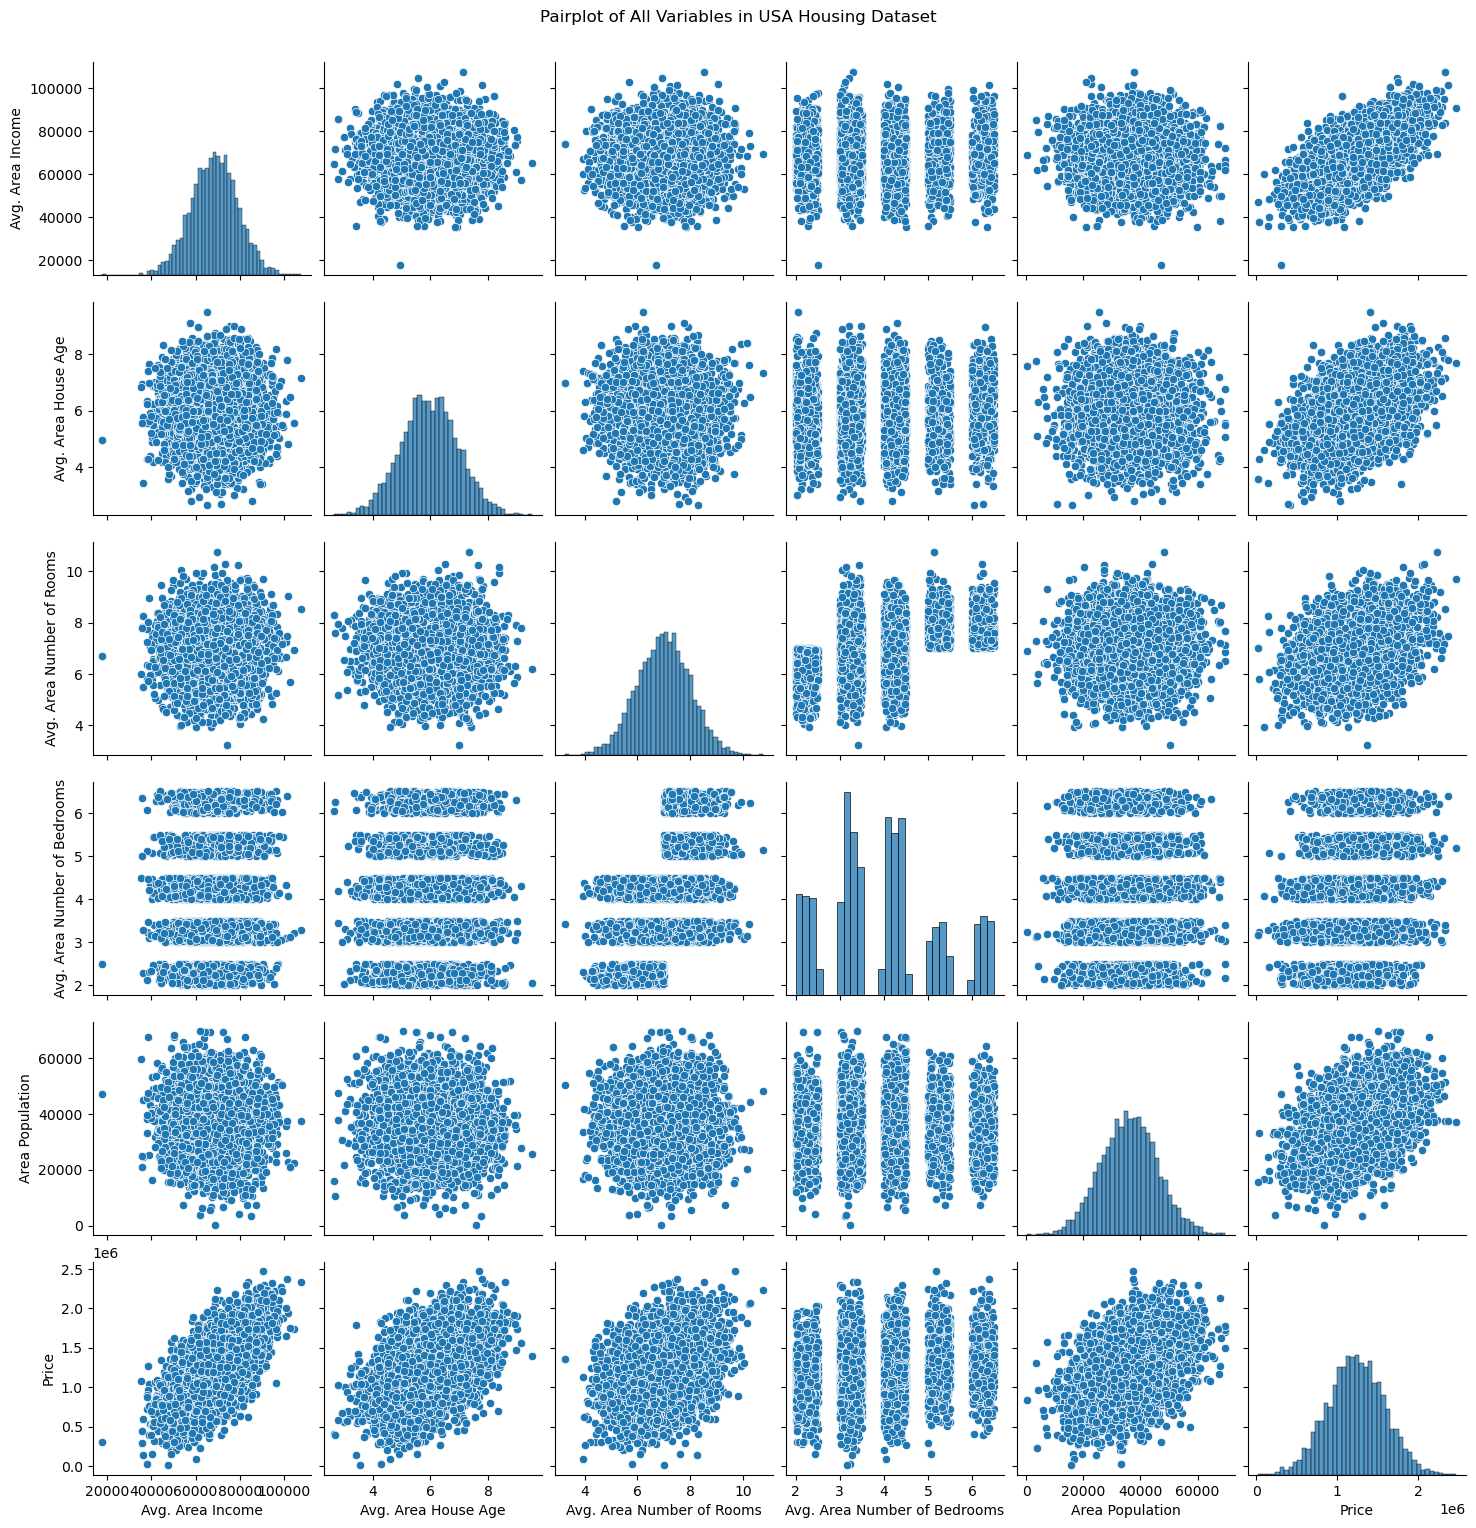

In [41]:
# A pairplot creates a grid of Axes such that each variable in the data is shared across the y-axes across a single row and the x-axes across a single column.
# It plots pairwise relationships in the dataset and shows the distribution of a single variable on the diagonal axes.
# This is excellent for spotting correlations and patterns between features at a glance.
sns.pairplot(USAhousing)
plt.suptitle("Pairplot of All Variables in USA Housing Dataset", y=1.02) # Add a title with a slight vertical adjustment
plt.show()

## Distplot (or histplot)

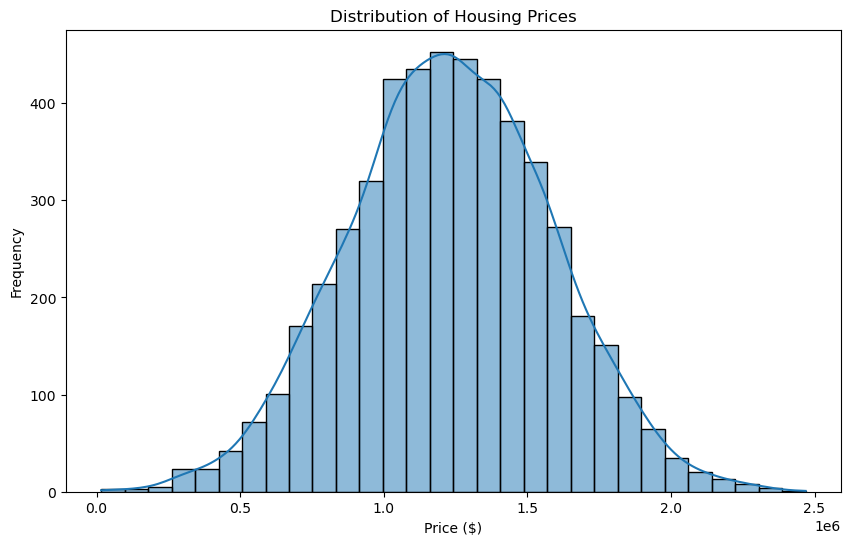

In [47]:
# We use it here to visualize the distribution of our target variable: 'Price'.
# Understanding the distribution of the target is crucial; many models assume it is normally distributed.
plt.figure(figsize=(10, 6))
sns.histplot(USAhousing['Price'], kde=True, bins=30)
plt.title('Distribution of Housing Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

## Heatmap

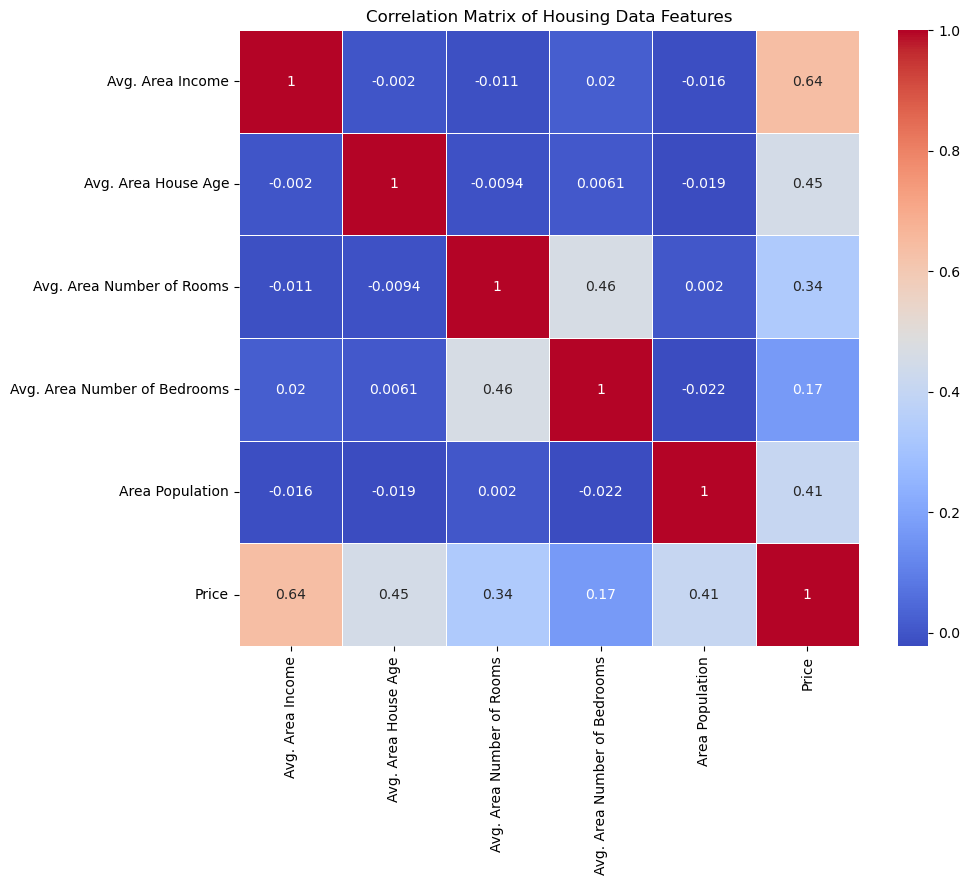

In [52]:
#We use it here to visualize the correlation matrix. Correlation measures the linear relationship between variables.
# Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation). 0 indicates no linear correlation.
plt.figure(figsize=(10, 8))
# Calculate the correlation matrix for all numerical columns
correlation_matrix = USAhousing.corr(numeric_only=True)
# Create the heatmap, annotating each cell with the numerical value and using a cool color map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Housing Data Features')
plt.show()

# Preparing Data for the Model
**Machine learning models require the data to be in a specific format. We need to separate our features (X) from our target variable (y) and split the data into training and testing sets.**

In [63]:
# Define our Feature Matrix (X). These are the independent variables the model will use to make predictions.
# We select all relevant numerical features. We exclude 'Address' as it is text-based and not directly usable by a linear model.
# We also exclude 'Price' because that is our target.
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

# Define our Target Vector (y). This is the dependent variable we want to predict.
y = USAhousing['Price']

# Train-Test Split
**It is critical to evaluate a model on data it has *never seen before* to test its generalizability. We hold back a portion of the data for testing.**

In [69]:
# Perform the split.
# test_size=0.4: 40% of the data will be reserved for testing; 60% will be used for training.
# random_state=101: This seed ensures the split is reproducible. Anyone using this seed will get the exact same split, which is good for collaboration and debugging.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Creating and Training the Linear Regression Model

In [72]:
# Now we instantiate the Linear Regression model from Scikit-Learn and train it on our training data. "Training" or "fitting" is the process where the model learns the relationship between the features (X_train) and the target (y_train).
# Create an instance of the LinearRegression model.
lm = LinearRegression()

# The .fit() method is where the "learning" happens.
# The model calculates the coefficients (slopes) and the intercept that minimize the error on the training data.
lm.fit(X_train, y_train)

print("Model training complete!")


Model training complete!


#  Model Evaluation

## Interpreting the Coefficients
**Now that our model is trained, let's examine what it learned. The coefficients tell us the expected change in the target for a one-unit change in a feature, assuming all other features are held constant.**

In [76]:
# Print the intercept (bias) term. This is the predicted value if all feature values are zero.
print("Intercept (Base Price):", lm.intercept_)

Intercept (Base Price): -2640159.79685191


In [78]:
# Create a DataFrame to neatly display the feature names and their corresponding coefficients.
# lm.coef_ contains the coefficients (slopes) for each feature.
# X.columns provides the feature names.
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420



- **Avg. Area Income:**  
  A 1-unit increase in average area income is associated with a **$21.52 increase** in home price, all else equal.

- **Avg. Area House Age:**  
  A 1-year increase in the average house age is associated with a **$164,883.28 increase** in home price.

- **Avg. Area Number of Rooms:**  
  A 1-room increase in the average number of rooms is associated with a **$122,368.67 increase** in home price.

- **Avg. Area Number of Bedrooms:**  
  A 1-bedroom increase is associated with a **$2,233.80 increase** in home price.

- **Area Population:**  
  A 1-person increase in the area population is associated with a **$15.15 increase** in home price.

---

### ⚠️ Important Note  
**These interpretations are based on the model's findings in this specific dataset.  
The surprisingly large coefficients for **House Age** and **Rooms** might indicate underlying correlations with other, more influential factors (a phenomenon known as *multicollinearity*), or they could simply be quirks of this synthetic dataset.**

In a real-world scenario, these results would need further investigation.
